In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
data = pd.read_csv("merged_train.csv")

#### 1. (5 pts.) Partition the merged dataset into a training set and a validation set using the holdout method or the cross-validation method. How did you partition the dataset?

In [3]:
without_democratic = data.drop('Democratic', axis = 1)
without_republican = data.drop('Republican', axis = 1)
without_party = data.drop('Party', axis = 1)

In [4]:
without_object_democratic = without_democratic.select_dtypes(exclude = ['object'])
without_object_republican = without_republican.select_dtypes(exclude = ['object'])
without_object_party = without_party.select_dtypes(exclude = ['object'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(without_object_democratic, data['Democratic'], test_size = 0.2, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)

#### 2. (5 pts.) Standardize the training set and the validation set

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_val_scaled = scaler.transform(X_val)

#### 3. (25 pts.) Build a linear regression model to predict the number of votes cast for the Democratic party in each county. Consider multiple combinations of predictor variables. Compute evaluation metrics for the validation set and report your results. What is the best performing linear regression model? What is the performance of the model? How did you select the variables of the model? • Repeat this task for the number of votes cast for the Republican party in each county.


### For Democratic

##### simple linear regression

In [7]:
model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled[:, 9].reshape(-1,1), y = y_train)

In [8]:
predicted = fitted_model.predict(X = x_val_scaled[:, 9].reshape(-1,1))

In [9]:
corr_coef = np.corrcoef(predicted, y_val)[1, 0]
R_squared = corr_coef ** 2
print(R_squared)

0.08929801825744796


##### multiple linear regression - some important variable from project 1 we concluded

In [10]:
model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled[:,[1,2,3,4,5,9]], y = y_train)
print(fitted_model.coef_)

[67962.45973905 -3171.8252931   -467.66554154 -9363.69700015
  6762.8724789   3816.04870381]


In [11]:
predicted = fitted_model.predict(X = x_val_scaled[:,[1,2,3,4,5,9]])

In [12]:
corr_coef = np.corrcoef(predicted, y_val)[1, 0]
R_squared = corr_coef ** 2
print(R_squared)

0.9084994153859296


##### multiple linear regression - all predictors

In [13]:
model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled, y = y_train)
print(fitted_model.coef_)

[ -546.55850856 42812.99704265 -2280.23062168  -482.86448536
 -7381.63591552  5484.87034677  -486.49271729 -1166.02349382
  -321.2106524  -1479.22366223  -543.05147294  3786.96645437
 -6946.03570658  4214.98730272 27501.78477816  4769.70396631]


In [14]:
predicted = fitted_model.predict(X = x_val_scaled)

In [15]:
corr_coef = np.corrcoef(predicted, y_val)[1, 0]
R_squared = corr_coef ** 2
print(R_squared)

0.8758266318326811


#### Regularization - LASSO

In [16]:
model = linear_model.Lasso(alpha = 1)
fitted_model = model.fit(X = x_train_scaled, y = y_train)
print(fitted_model.coef_)

[ -544.93747082 42815.56782982 -2263.75025995  -473.91535413
 -7366.63299357  5485.0750909   -486.33730733 -1155.20487371
  -310.65542896 -1471.87635189  -539.10809033  3780.71576618
 -6938.35313584  4213.15058195 27498.16501095  4770.51795953]


In [17]:
predicted = fitted_model.predict(X = x_val_scaled)

In [18]:
corr_coef = np.corrcoef(predicted, y_val)[1, 0]
R_squared = corr_coef ** 2
print(R_squared)

0.8758405616916989


### For Republican

#### simple linear regression

In [19]:
X_train, X_test, y_train, y_test = train_test_split(without_object_republican, data['Republican'], test_size = 0.2, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)

In [20]:
model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled[:, 9].reshape(-1,1), y = y_train)

In [21]:
predicted = fitted_model.predict(X = x_val_scaled[:, 9].reshape(-1,1))

In [22]:
corr_coef = np.corrcoef(predicted, y_val)[1, 0]
R_squared = corr_coef ** 2
print(R_squared)

0.08647568242597219


#### multiple linear regression - some important variable 

In [23]:
model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled[:,[1,2,3,4,5,9]], y = y_train)

In [24]:
predicted = fitted_model.predict(X = x_val_scaled[:,[1,2,3,4,5,9]])

In [25]:
corr_coef = np.corrcoef(predicted, y_val)[1, 0]
R_squared = corr_coef ** 2
print(R_squared)

0.833473462345875


#### multiple linear regression - all predictors

In [26]:
model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled, y = y_train)

In [27]:
predicted = fitted_model.predict(X = x_val_scaled)

In [28]:
corr_coef = np.corrcoef(predicted, y_val)[1, 0]
R_squared = corr_coef ** 2
print(R_squared)

1.0


#### LASSO

In [29]:
model = linear_model.Lasso(alpha = 1)
fitted_model = model.fit(X = x_train_scaled, y = y_train)

In [30]:
predicted = fitted_model.predict(X = x_val_scaled)

In [31]:
corr_coef = np.corrcoef(predicted, y_val)[1, 0]
R_squared = corr_coef ** 2
print(R_squared)

0.9999999772208236


#### plot Democratics

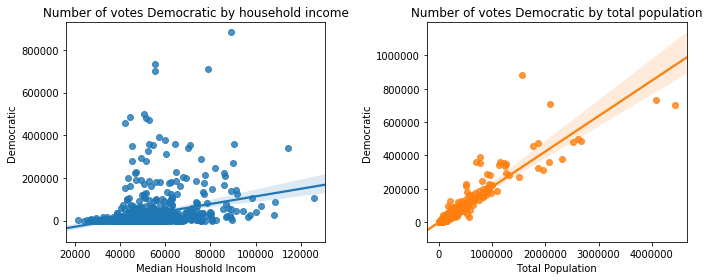

In [32]:
# Plot total bill and size vs tip
fig, axes = plt.subplots(1, 2, figsize = (10, 4))
ax = sns.regplot(data['Median Household Income'], data['Democratic'], ax = axes[0])
ax.set(title = 'Number of votes Democratic by household income', xlabel = 'Median Houshold Incom', ylabel = 'Democratic')
ax = sns.regplot(data['Total Population'], data['Democratic'], ax = axes[1])
ax.set(title = 'Number of votes Democratic by total population', xlabel = 'Total Population', ylabel = 'Democratic')
plt.tight_layout()

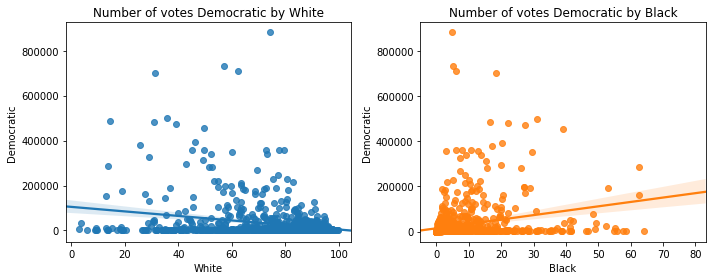

In [33]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4))
ax = sns.regplot(data['Percent White, not Hispanic or Latino'], data['Democratic'], ax = axes[0])
ax.set(title = 'Number of votes Democratic by White', xlabel = 'White', ylabel = 'Democratic')
ax = sns.regplot(data['Percent Black, not Hispanic or Latino'], data['Democratic'], ax = axes[1])
ax.set(title = 'Number of votes Democratic by Black', xlabel = 'Black', ylabel = 'Democratic')
plt.tight_layout()

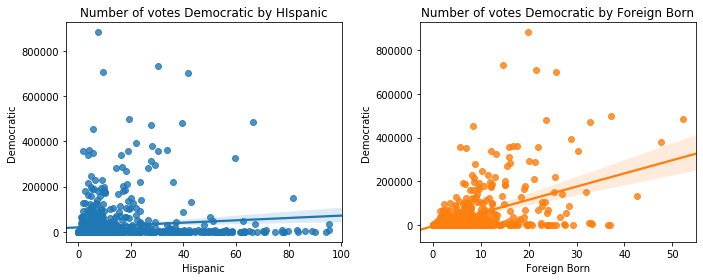

In [34]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4))
ax = sns.regplot(data['Percent Hispanic or Latino'], data['Democratic'], ax = axes[0])
ax.set(title = 'Number of votes Democratic by HIspanic', xlabel = 'Hispanic', ylabel = 'Democratic')
ax = sns.regplot(data['Percent Foreign Born'], data['Democratic'], ax = axes[1])
ax.set(title = 'Number of votes Democratic by Foreign Born', xlabel = 'Foreign Born', ylabel = 'Democratic')
plt.tight_layout()

#### 4.(25 pts.) Build a classification model to classify each county as Democratic or Republican. Consider at least two different classification techniques with multiple combinations of parameters and multiple combinations of variables. Compute evaluation metrics for the validation set and report your results. What is the best  performing classification model? What is the performance of the model? How did you select the parameters of the model? How did you select the variables of the model?

In [35]:
X_train, X_test, y_train, y_test = train_test_split(without_object_party, data['Party'], test_size = 0.2, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 1)

In [36]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_val_scaled = scaler.transform(X_val)
x_test_scaled = scaler.transform(X_test)

##### Decision Tree

In [37]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [38]:
y_pred = classifier.predict(x_val_scaled)

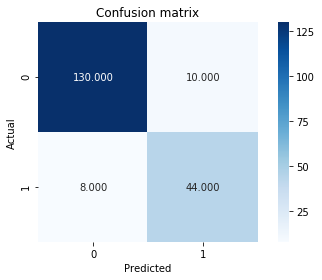

In [39]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [40]:
accuracy = metrics.accuracy_score(y_val, y_pred)
print("accuracy: ", accuracy)
error = 1 - accuracy
print("error: ", error)
precision = metrics.precision_score(y_val, y_pred, average = None)
print("precision: ", precision)
recall = metrics.recall_score(y_val, y_pred, average = None)
print("recall: ", recall)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print("F1_score: ", F1_score)

accuracy:  0.90625
error:  0.09375
precision:  [0.94202899 0.81481481]
recall:  [0.92857143 0.84615385]
F1_score:  [0.9352518  0.83018868]


##### K nearest neighbors

In [41]:
classifier = KNeighborsClassifier(n_neighbors = 5)  
classifier.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [42]:
y_pred = classifier.predict(x_val_scaled)

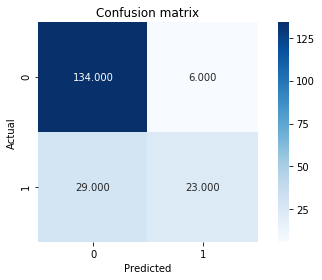

In [43]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [44]:
accuracy = metrics.accuracy_score(y_val, y_pred)
print("accuracy: ", accuracy)
error = 1 - accuracy
print("error: ", error)
precision = metrics.precision_score(y_val, y_pred, average = None)
print("precision: ", precision)
recall = metrics.recall_score(y_val, y_pred, average = None)
print("recall: ", recall)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print("F1_score: ", F1_score)

accuracy:  0.8177083333333334
error:  0.18229166666666663
precision:  [0.82208589 0.79310345]
recall:  [0.95714286 0.44230769]
F1_score:  [0.88448845 0.56790123]


##### Naive Bayes

In [45]:
classifier = GaussianNB()  
classifier.fit(x_train_scaled, y_train)

GaussianNB()

In [46]:
y_pred = classifier.predict(x_val_scaled)

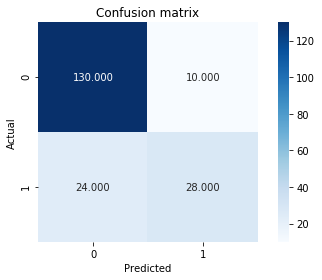

In [47]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [48]:
accuracy = metrics.accuracy_score(y_val, y_pred)
print("accuracy: ", accuracy)
error = 1 - accuracy
print("error: ", error)
precision = metrics.precision_score(y_val, y_pred, average = None)
print("precision: ", precision)
recall = metrics.recall_score(y_val, y_pred, average = None)
print("recall: ", recall)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print("F1_score: ", F1_score)

accuracy:  0.8229166666666666
error:  0.17708333333333337
precision:  [0.84415584 0.73684211]
recall:  [0.92857143 0.53846154]
F1_score:  [0.88435374 0.62222222]


##### Support Vector Machines

In [49]:
classifier = SVC(kernel = 'rbf')  
classifier.fit(x_train_scaled, y_train)

SVC()

In [50]:
y_pred = classifier.predict(x_val_scaled)

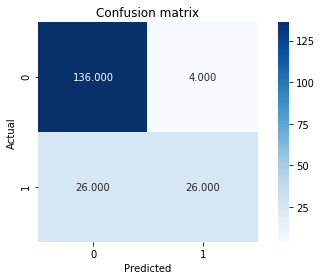

In [51]:
conf_matrix = metrics.confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

In [52]:
accuracy = metrics.accuracy_score(y_val, y_pred)
print("accuracy: ", accuracy)
error = 1 - accuracy
print("error: ", error)
precision = metrics.precision_score(y_val, y_pred, average = None)
print("precision: ", precision)
recall = metrics.recall_score(y_val, y_pred, average = None)
print("recall: ", recall)
F1_score = metrics.f1_score(y_val, y_pred, average = None)
print("F1_score: ", F1_score)

accuracy:  0.84375
error:  0.15625
precision:  [0.83950617 0.86666667]
recall:  [0.97142857 0.5       ]
F1_score:  [0.90066225 0.63414634]
